In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor

import numpy as np
import pylab as pl

from exactcover import *
import os
from matplotlib import rc
font = {'size' : 16}
rc('font', **font);
rc('text', usetex=True)

import sys
sys.path.append('../')

from qiskit_utilities.utilities import *


In [3]:
FR = np.zeros((3,4))
FR[0,0]=1
FR[1,0]=1
FR[2,1]=1
FR[1,1]=0
FR[0,2]=1
FR[1,3]=1
FR

array([[1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [4]:
# FR = np.zeros((2,2))
# FR[0,0]=1
# FR[1,0]=1
# FR[0,1]=1
# FR

In [5]:
options={}
options['FR']=FR
options['usebarrier']=True
circ=createCircuit_ExactCover(np.array((0.1,0.2)), 1, options)
circ.draw()

┌───┐                       ░                        ░  ┌──────────┐»
q0_0: ┤ H ├──■────────────────■───░───■────────────────■───░──┤ RX(-0.4) ├»
      ├───┤  │                │   ░   │                │   ░ ┌┴──────────┤»
q0_1: ┤ H ├──┼────────────────┼───░───┼────────────────┼───░─┤ RZ(-0.05) ├»
      ├───┤┌─┴─┐┌──────────┐┌─┴─┐ ░   │                │   ░ └┬──────────┤»
q0_2: ┤ H ├┤ X ├┤ RZ(0.05) ├┤ X ├─░───┼────────────────┼───░──┤ RX(-0.4) ├»
      ├───┤└───┘└──────────┘└───┘ ░ ┌─┴─┐┌──────────┐┌─┴─┐ ░  ├──────────┤»
q0_3: ┤ H ├───────────────────────░─┤ X ├┤ RZ(0.05) ├┤ X ├─░──┤ RX(-0.4) ├»
      └───┘                       ░ └───┘└──────────┘└───┘ ░  └──────────┘»
c0: 4/════════════════════════════════════════════════════════════════════»
                                                                          »
«                   ░ ┌─┐         
«q0_0: ─────────────░─┤M├─────────
«      ┌──────────┐ ░ └╥┘┌─┐      
«q0_1: ┤ RX(-0.4) ├─░──╫─┤M├──────
«      └──────────┘ ░  ║ └╥┘┌─┐   
«q0_2: ─────────────░──╫──╫─┤M├───
«                   ░  ║  ║ └╥┘┌─┐
«q0_3: ─────────────░──╫──╫──╫─┤M├
«                   ░  ║  ║  ║ └╥┘
«c0: 4/════════════════╩══╩══╩══╩═
«                      0  1  2  3

In [6]:
from qaoa import *
Aer.backends()
backend = Aer.get_backend('qasm_simulator')

In [7]:
beta_n = 20
gamma_n = 40
beta_max = np.pi
gamma_max = 2*np.pi
optmethod='Nelder-Mead'        
shots=1024*2*2*2
rerun=True
maxdepth=4

Elandscape, gammabetas, E, best =  runQAOA(createCircuit_ExactCover, measurementStatistics_ExactCover, backend, gamma_n, beta_n, gamma_max, beta_max, optmethod=optmethod, shots=shots, rerun=rerun, maxdepth=maxdepth, options=options)

depth = 1
Calculating Energy landscape...
Calculating Energy landscape done
depth = 1 rep = 0
Optimization terminated successfully.
         Current function value: 0.507080
         Iterations: 8
         Function evaluations: 22
depth = 1 rep = 1
Optimization terminated successfully.
         Current function value: 0.508911
         Iterations: 14
         Function evaluations: 34
depth = 1 rep = 2
Optimization terminated successfully.
         Current function value: 0.504150
         Iterations: 10
         Function evaluations: 28
depth = 1 rep = 3
Optimization terminated successfully.
         Current function value: 0.507568
         Iterations: 10
         Function evaluations: 23
depth = 1 rep = 4
Optimization terminated successfully.
         Current function value: 0.506714
         Iterations: 11
         Function evaluations: 25
depth = 2
depth = 2 rep = 0
Optimization terminated successfully.
         Current function value: 0.492432
         Iterations: 38
         Func

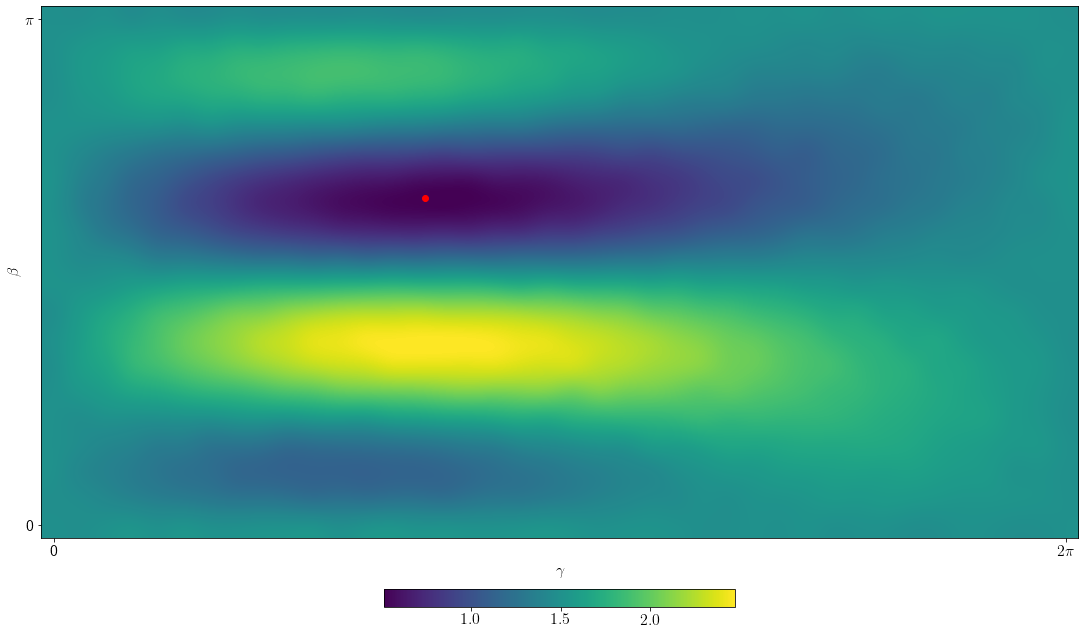

In [8]:
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable

shiftg=gamma_max/(2*gamma_n)
shiftb=beta_max/(2*beta_n)

pl.figure(figsize=(20,10));
pl.clf()
pl.imshow(Elandscape,interpolation='spline36',origin='lower'
            ,extent=[-shiftg,gamma_max+shiftg,-shiftb,beta_max+shiftb], aspect=1)
pl.xticks([0,gamma_max], ['0', r'$2\pi$'])
pl.yticks([0,beta_max], ['0', r'$\pi$'])
pl.xlabel('$\gamma$',loc='center')
pl.ylabel(r'$\beta$',loc='center')
pl.colorbar(shrink=0.25, pad=0.075, orientation="horizontal")
pl.plot(gammabetas['xL_d1'][0], gammabetas['xL_d1'][1],'or')

pl.tight_layout()


In [9]:
circuit = createCircuit_ExactCover(gammabetas['xL_d1'], 1, options = options)
job = execute(circuit, backend, shots=shots)

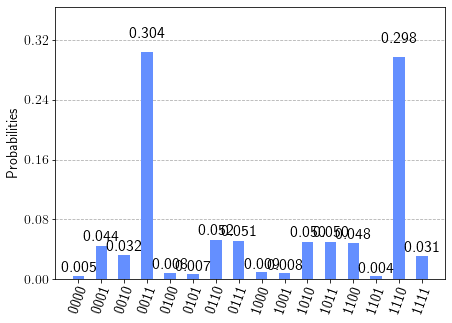

In [10]:
from qiskit.visualization import plot_histogram

plot_histogram(job.result().get_counts())

In [11]:
circuit = createCircuit_ExactCover(gammabetas['xL_d4'], 4, options = options)
job = execute(circuit, backend, shots=shots)

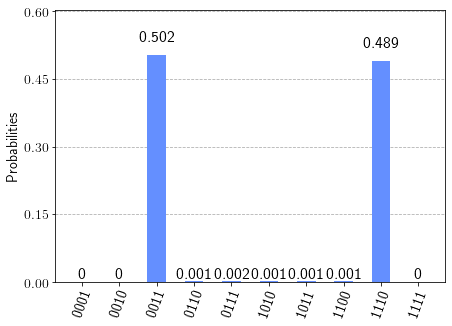

In [12]:
plot_histogram(job.result().get_counts())